## Porto Seguro Dataset - Data Analysis

The fact that the Porto Seguro competition is a binary classification task (the customer filed a claim or did not)

****Install Used Libraries****

In [2]:
install.packages("tidyverse")
install.packages("caret")
install.packages("verification")
install.packages("repr")
install.packages("arm")
install.packages("cowplot")
install.packages("LogicReg")
install.packages("superml")

package 'tidyverse' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\mercan.karacabey\AppData\Local\Temp\RtmpmQocK9\downloaded_packages
package 'caret' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'caret'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\mercan.karacabey\AppData\Local\Continuum\anaconda3\envs\R-tutorial\Lib\R\library\00LOCK\caret\libs\x64\caret.dll to C:\Users\mercan.karacabey\AppData\Local\Continuum\anaconda3\envs\R-tutorial\Lib\R\library\caret\libs\x64\caret.dll: Permission denied"Warning message:
"restored 'caret'"


The downloaded binary packages are in
	C:\Users\mercan.karacabey\AppData\Local\Temp\RtmpmQocK9\downloaded_packages
package 'verification' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\mercan.karacabey\AppData\Local\Temp\RtmpmQocK9\downloaded_packages
package 'repr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\mercan.karacabey\AppData\Local\Temp\RtmpmQocK9\downloaded_packages
package 'arm' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\mercan.karacabey\AppData\Local\Temp\RtmpmQocK9\downloaded_packages
package 'cowplot' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\mercan.karacabey\AppData\Local\Temp\RtmpmQocK9\downloaded_packages
package 'LogicReg' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'LogicReg'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\mercan.karacabey\AppData\Local\Continuum\anaconda3\envs\R-tutorial\Lib\R\library\00LOCK\LogicReg\libs\x64\LogicReg.dll to C:\Users\mercan.karacabey\AppData\Local\Continuum\anaconda3\envs\R-tutorial\Lib\R\library\LogicReg\libs\x64\LogicReg.dll: Permission denied"Warning message:
"restored 'LogicReg'"


The downloaded binary packages are in
	C:\Users\mercan.karacabey\AppData\Local\Temp\RtmpmQocK9\downloaded_packages
package 'superml' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\mercan.karacabey\AppData\Local\Temp\RtmpmQocK9\downloaded_packages


***Import libraries***

In [5]:
suppressPackageStartupMessages(library(tidyverse))
suppressPackageStartupMessages(library(caret))
suppressPackageStartupMessages(library(verification))
library(arm)
library(cowplot)
library(LogicReg)
library(superml)

Warning message:
"package 'arm' was built under R version 3.6.2"Loading required package: Matrix
Warning message:
"package 'Matrix' was built under R version 3.6.2"
Attaching package: 'Matrix'

The following object is masked from 'package:spam':

    det

The following objects are masked from 'package:tidyr':

    expand, pack, unpack

Loading required package: lme4
Warning message:
"package 'lme4' was built under R version 3.6.2"
arm (Version 1.10-1, built: 2018-4-12)

Working directory is C:/Users/mercan.karacabey


Attaching package: 'arm'

The following object is masked from 'package:boot':

    logit

The following object is masked from 'package:spam':

    display

Warning message:
"package 'cowplot' was built under R version 3.6.2"
********************************************************
Note: As of version 1.0.0, cowplot does not change the
  default ggplot2 theme anymore. To recover the previous
  behavior, execute:
  theme_set(theme_cowplot())
********************************

#### Data Collection - Import Operations

Data Collection is the process of gathering information on targeted variables identified as data requirements. The emphasis is on ensuring accurate and honest collection of data. Data Collection ensures that data gathered is accurate such that the related decisions are valid. Data Collection provides both a baseline to measure and a target to improve.

Data is collected from various sources ranging from organizational databases to the information in web pages. The data thus obtained, may not be structured and may contain irrelevant information.

###### Save the data in dataframe
Data frame is a two dimensional data structure in R. It is a special case of a list which has each component of equal length.

Each component form the column and contents of the component form the rows.

In [48]:
df <- read.csv("train.csv")
str(df)

'data.frame':	595212 obs. of  59 variables:
 $ id            : int  7 9 13 16 17 19 20 22 26 28 ...
 $ target        : int  0 0 0 0 0 0 0 0 0 1 ...
 $ ps_ind_01     : int  2 1 5 0 0 5 2 5 5 1 ...
 $ ps_ind_02_cat : int  2 1 4 1 2 1 1 1 1 1 ...
 $ ps_ind_03     : int  5 7 9 2 0 4 3 4 3 2 ...
 $ ps_ind_04_cat : int  1 0 1 0 1 0 1 0 1 0 ...
 $ ps_ind_05_cat : int  0 0 0 0 0 0 0 0 0 0 ...
 $ ps_ind_06_bin : int  0 0 0 1 1 0 0 1 0 0 ...
 $ ps_ind_07_bin : int  1 0 0 0 0 0 1 0 0 1 ...
 $ ps_ind_08_bin : int  0 1 1 0 0 0 0 0 1 0 ...
 $ ps_ind_09_bin : int  0 0 0 0 0 1 0 0 0 0 ...
 $ ps_ind_10_bin : int  0 0 0 0 0 0 0 0 0 0 ...
 $ ps_ind_11_bin : int  0 0 0 0 0 0 0 0 0 0 ...
 $ ps_ind_12_bin : int  0 0 0 0 0 0 0 0 0 0 ...
 $ ps_ind_13_bin : int  0 0 0 0 0 0 0 0 0 0 ...
 $ ps_ind_14     : int  0 0 0 0 0 0 0 0 0 0 ...
 $ ps_ind_15     : int  11 3 12 8 9 6 8 13 6 4 ...
 $ ps_ind_16_bin : int  0 0 1 1 1 1 1 1 1 0 ...
 $ ps_ind_17_bin : int  1 0 0 0 0 0 0 0 0 0 ...
 $ ps_ind_18_bin : int  0 1 0 0 0

In [92]:
df_test <- read.csv("test.csv")

Hosts are asking for predicted probabilities that each of the customers in the test data filed a claim. We are given 56 anonymized features which we can use to model claims and make predictions. 

**summary()** function is a generic function used to produce result summaries of the results of various model fitting functions. The function invokes particular methods which depend on the class of the first argument.

In [7]:
summary(df)

       id              target          ps_ind_01   ps_ind_02_cat   
 Min.   :      7   Min.   :0.00000   Min.   :0.0   Min.   :-1.000  
 1st Qu.: 371992   1st Qu.:0.00000   1st Qu.:0.0   1st Qu.: 1.000  
 Median : 743548   Median :0.00000   Median :1.0   Median : 1.000  
 Mean   : 743804   Mean   :0.03645   Mean   :1.9   Mean   : 1.359  
 3rd Qu.:1115549   3rd Qu.:0.00000   3rd Qu.:3.0   3rd Qu.: 2.000  
 Max.   :1488027   Max.   :1.00000   Max.   :7.0   Max.   : 4.000  
   ps_ind_03      ps_ind_04_cat     ps_ind_05_cat     ps_ind_06_bin   
 Min.   : 0.000   Min.   :-1.0000   Min.   :-1.0000   Min.   :0.0000  
 1st Qu.: 2.000   1st Qu.: 0.0000   1st Qu.: 0.0000   1st Qu.:0.0000  
 Median : 4.000   Median : 0.0000   Median : 0.0000   Median :0.0000  
 Mean   : 4.423   Mean   : 0.4168   Mean   : 0.4052   Mean   :0.3937  
 3rd Qu.: 6.000   3rd Qu.: 1.0000   3rd Qu.: 0.0000   3rd Qu.:1.0000  
 Max.   :11.000   Max.   : 1.0000   Max.   : 6.0000   Max.   :1.0000  
 ps_ind_07_bin   ps_ind_08_

In statistics and machine learning we usually split our data into two subsets: training data and testing data (and sometimes to three: train, validate and test), and fit our model on the train data, in order to make predictions on the test data. 

In [49]:
# set seed for reproducibility
set.seed(123)

# making a train index
train_index <- sample(c(TRUE, FALSE), replace = TRUE, size = nrow(df), prob = c(0.2, 0.8))

# split the data according to the train index
training <- as.data.frame(df[train_index, ])
testing <- as.data.frame(df[!train_index, ])

### Logistic Regression for Classification

Logistic regression is the appropriate regression analysis to conduct when the dependent variable is dichotomous (binary).  Like all regression analyses, the logistic regression is a predictive analysis.  Logistic regression is used to describe data and to explain the relationship between one dependent binary variable and one or more nominal, ordinal, interval or ratio-level independent variables.

Logistic regression is a derivative of linear regression where we are interested in making binary predictions or probability predictions on the interval [0, 1] with a threshold probability to determine where we split between 0 and 1.

We want to predict, the customer filed a claim or did not

In [9]:
logmod <- glm(target ~ . - id, data = training, family = binomial(link = 'logit'))

In [10]:
summary(logmod)


Call:
glm(formula = target ~ . - id, family = binomial(link = "logit"), 
    data = training)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.7759  -0.2941  -0.2544  -0.2219   3.0147  

Coefficients: (2 not defined because of singularities)
                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)    -4.5221132  0.3396053 -13.316  < 2e-16 ***
ps_ind_01       0.0092039  0.0086529   1.064  0.28747    
ps_ind_02_cat   0.0029431  0.0235955   0.125  0.90074    
ps_ind_03       0.0172087  0.0061843   2.783  0.00539 ** 
ps_ind_04_cat   0.0266657  0.0353680   0.754  0.45088    
ps_ind_05_cat   0.0910532  0.0099013   9.196  < 2e-16 ***
ps_ind_06_bin   0.0016394  0.0504358   0.033  0.97407    
ps_ind_07_bin   0.2813998  0.0525192   5.358 8.41e-08 ***
ps_ind_08_bin   0.3371190  0.0542036   6.219 4.99e-10 ***
ps_ind_09_bin          NA         NA      NA       NA    
ps_ind_10_bin  -0.3613633  0.7329346  -0.493  0.62199    
ps_ind_11_bin  -0.0734907  0.3607463  -

In [11]:
preds <- predict(logmod, newdata = testing, type = "response")

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"

####  Accuracy & Other Metrics 

In [12]:
y_pred_num <- ifelse(preds > 0.5, 1, 0)
y_pred <- factor(y_pred_num, levels=c(0, 1))
y_act <- testing$target

# Accuracy
mean(y_pred == y_act)  

[1] 0.9635972

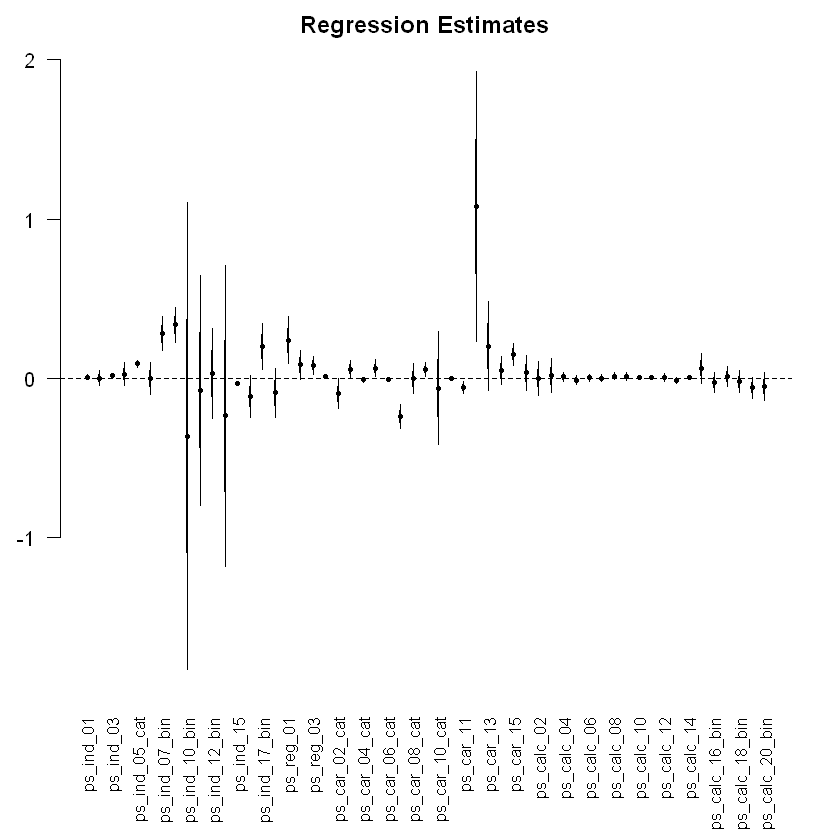

In [13]:
coefplot(logmod, vertical=FALSE, mar=c(5.5,2.5,2,2))

In [14]:
tapply(preds, testing$target, mean)

0          1 
0.03633926 0.04400449

#### Confusion Matrix for different threshold values

In [26]:
# Confusion matrix for threshold of 0.1
table(testing$target, preds > 0.1)

# Confusion matrix for threshold of 0.3
table(testing$target, preds > 0.3)

# Confusion matrix for threshold of 0.5
table(testing$target, preds > 0.5)

# Confusion matrix for threshold of 0.7
table(testing$target, preds > 0.7)

   
     FALSE   TRUE
  0 454318   4652
  1  16832    507

   
     FALSE   TRUE
  0 458969      1
  1  17338      1

   
     FALSE
  0 458970
  1  17339

   
     FALSE
  0 458970
  1  17339

   
     FALSE   TRUE
  0 454318   4652
  1  16832    507

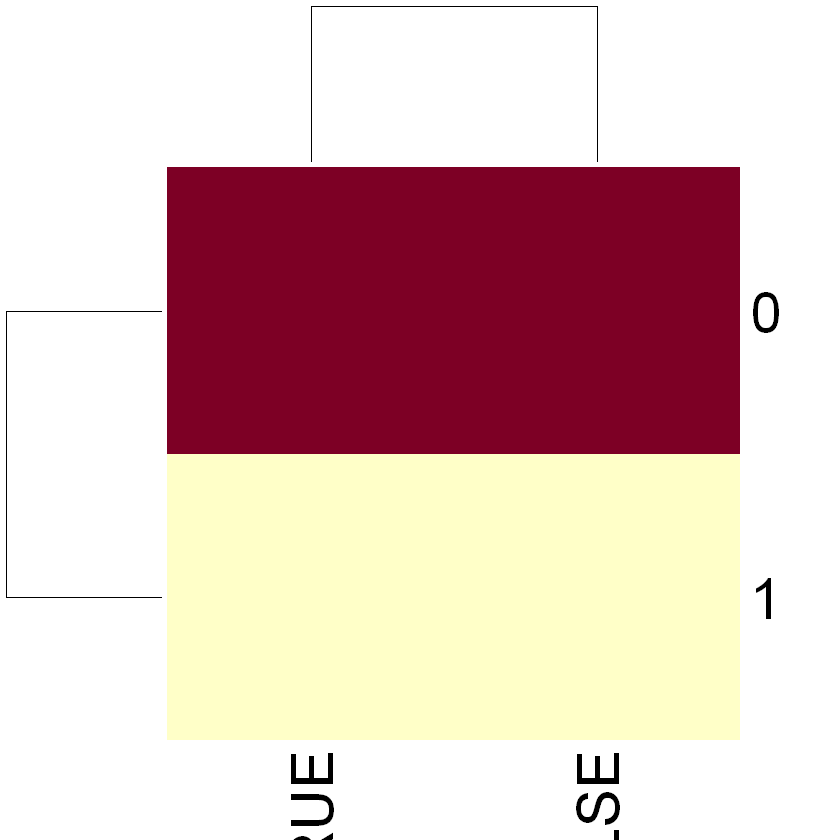

In [27]:
# Use 'scale' to normalize
table(testing$target, preds > 0.1)

data <- as.matrix(table(testing$target, preds > 0.1))
heatmap(data, scale="column")

#### ROC Curve

In [28]:
install.packages("ROCR")
library(ROCR)

package 'ROCR' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\mercan.karacabey\AppData\Local\Temp\RtmpmQocK9\downloaded_packages


Warning message:
"package 'ROCR' was built under R version 3.6.2"Loading required package: gplots
Warning message:
"package 'gplots' was built under R version 3.6.2"
Attaching package: 'gplots'

The following object is masked from 'package:stats':

    lowess



In [29]:
ROCRpred = prediction(preds, testing$target)

In [30]:
ROCRperf = performance(ROCRpred, "tpr", "fpr")

In [88]:
## AUC Value

auc.tmp <- performance(ROCRpred,"auc");
auc <- as.numeric(auc.tmp@y.values)

In [89]:
auc

[1] 0.618827

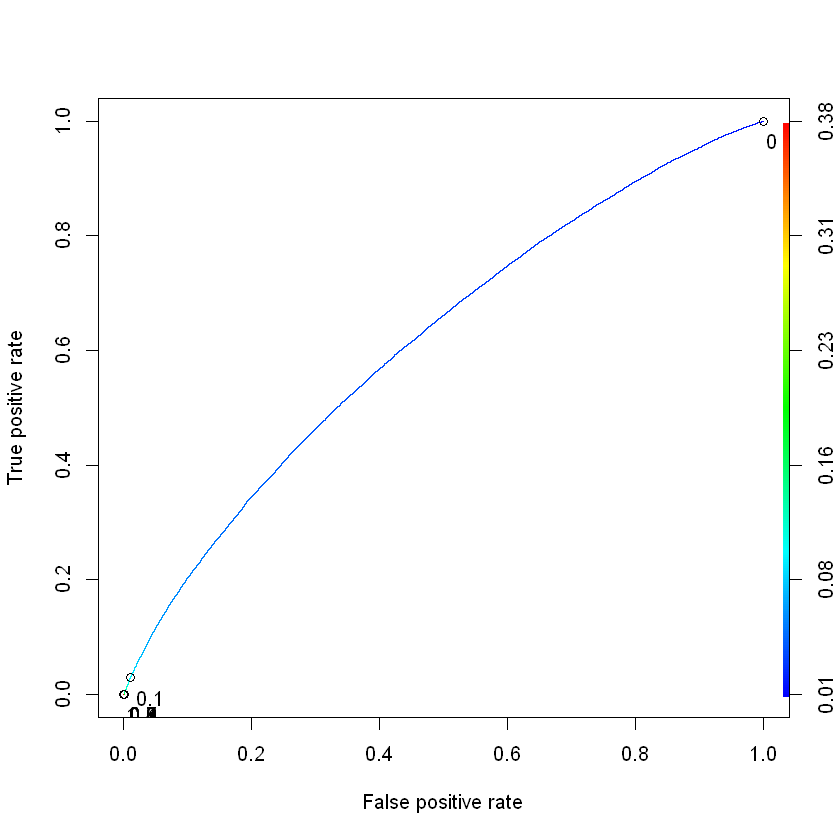

In [31]:
plot(ROCRperf, colorize=TRUE, print.cutoffs.at=seq(0,1,by=0.1), text.adj=c(-0.2,1.7))

In [33]:
install.packages("data.table")

library(data.table)

package 'data.table' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'data.table'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\mercan.karacabey\AppData\Local\Continuum\anaconda3\envs\R-tutorial\Lib\R\library\00LOCK\data.table\libs\x64\datatable.dll to C:\Users\mercan.karacabey\AppData\Local\Continuum\anaconda3\envs\R-tutorial\Lib\R\library\data.table\libs\x64\datatable.dll: Permission denied"Warning message:
"restored 'data.table'"


The downloaded binary packages are in
	C:\Users\mercan.karacabey\AppData\Local\Temp\RtmpmQocK9\downloaded_packages


Warning message:
"package 'data.table' was built under R version 3.6.2"
Attaching package: 'data.table'

The following objects are masked from 'package:dplyr':

    between, first, last

The following object is masked from 'package:purrr':

    transpose



In [34]:
train_l <- as.tibble(fread('train.csv', na.strings=c("-1","-1.0")))

In [37]:
install.packages("corrplot")

package 'corrplot' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\mercan.karacabey\AppData\Local\Temp\RtmpmQocK9\downloaded_packages


In [38]:
library("corrplot")

Warning message:
"package 'corrplot' was built under R version 3.6.2"corrplot 0.84 loaded

Attaching package: 'corrplot'

The following object is masked from 'package:arm':

    corrplot



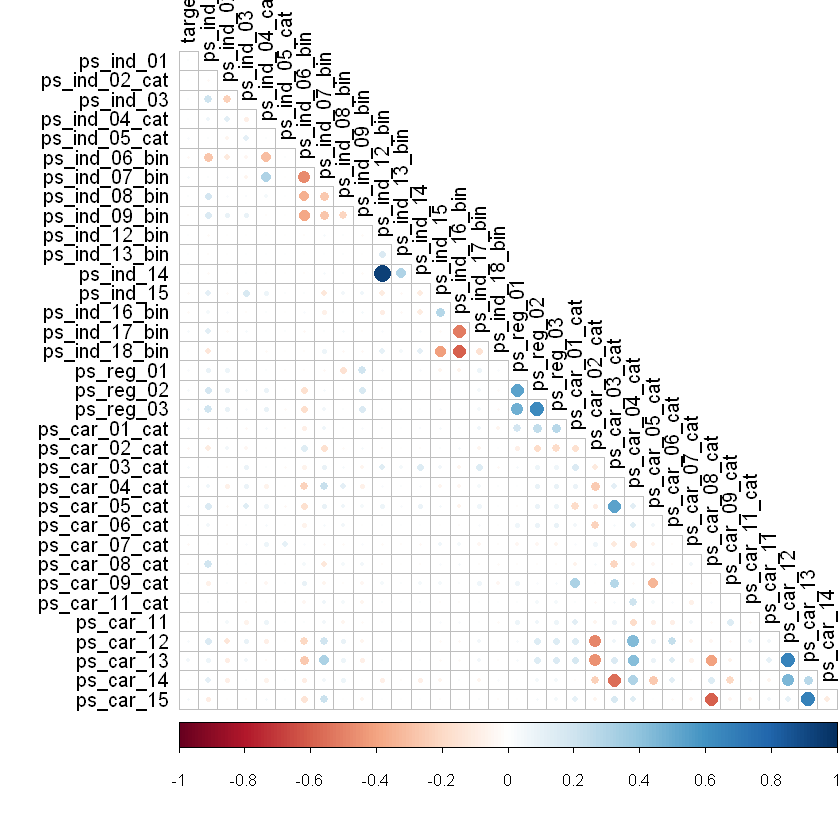

In [41]:
training %>%
  select(-starts_with("ps_calc"), -ps_ind_10_bin, -ps_ind_11_bin, -ps_car_10_cat, -id) %>%
  mutate_at(vars(ends_with("cat")), funs(as.integer)) %>%
  mutate_at(vars(ends_with("bin")), funs(as.integer)) %>%
  mutate(target = as.integer(target)) %>%
  cor(use="complete.obs", method = "spearman") %>%
  corrplot(type="lower", tl.col = "black",  diag=FALSE)

In [42]:
corr_check <- function(Dataset, threshold){
  matriz_cor <- cor(Dataset)
  matriz_cor

  for (i in 1:nrow(matriz_cor)){
    correlations <-  which((abs(matriz_cor[i,i:ncol(matriz_cor)]) > threshold) & (matriz_cor[i,i:ncol(matriz_cor)] != 1))
  
    if(length(correlations)> 0){
      lapply(correlations,FUN =  function(x) (cat(paste(colnames(Dataset)[i], "with",colnames(Dataset)[x]), "\n")))
     
    }
  }
}

corr_check(training, 0.50)

ps_ind_11_bin with ps_ind_02_cat 
ps_ind_12_bin with ps_ind_01 
ps_ind_16_bin with target 
ps_ind_16_bin with ps_ind_01 
ps_reg_01 with ps_ind_01 
ps_reg_02 with target 
ps_car_04_cat with ps_ind_08_bin 
ps_car_04_cat with ps_ind_09_bin 
ps_car_12 with target 
ps_car_13 with ps_ind_01 


##### Find the highly correlated columns & Drop It

[1] "training$ps_ind_11_bin"


[1] 0

[1] "training$ps_ind_02_cat"


[1] 36

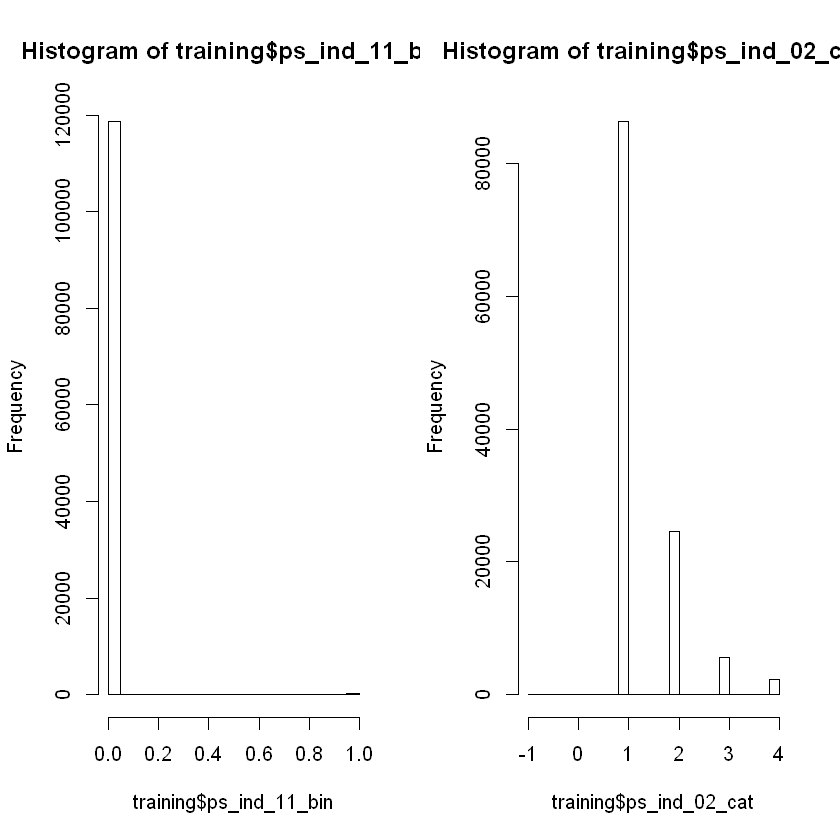

In [43]:
print("training$ps_ind_11_bin")
sum(training$ps_ind_11_bin==-1)
print("training$ps_ind_02_cat")
sum(training$ps_ind_02_cat==-1)
par(mfrow=c(1,2)) 
hist(training$ps_ind_11_bin)
hist(training$ps_ind_02_cat)

In [51]:
training$ps_ind_11_bin <- NULL 

[1] "training$ps_ind_12_bin"


[1] 0

[1] "training$ps_ind_01"


[1] 0

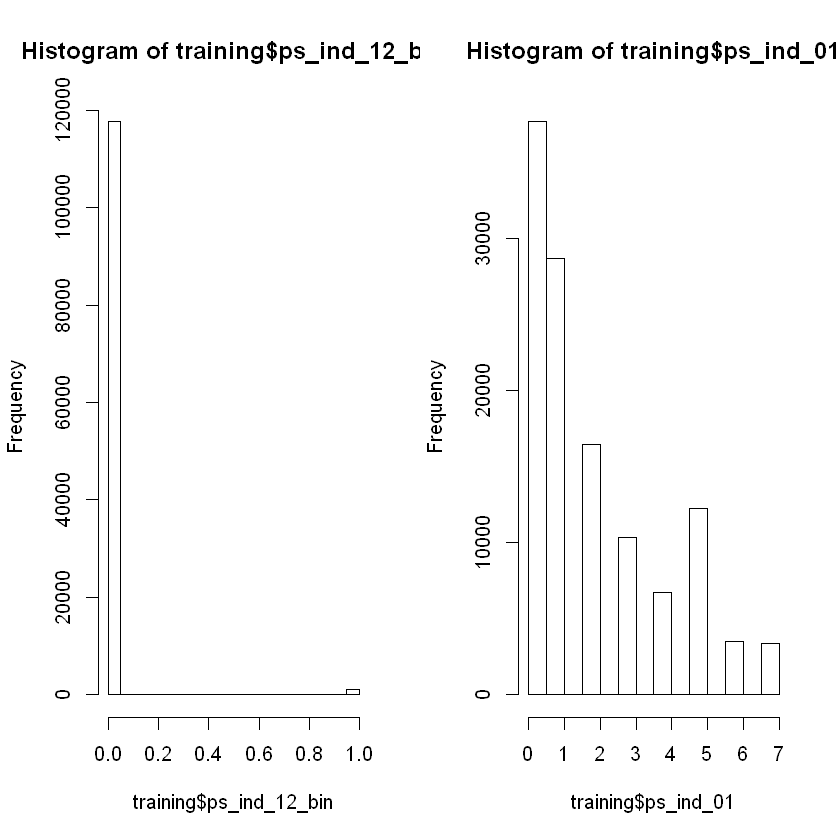

In [50]:
print("training$ps_ind_12_bin")
sum(training$ps_ind_12_bin==-1)
print("training$ps_ind_01")
sum(training$ps_ind_01==-1)
par(mfrow=c(1,2)) 
hist(training$ps_ind_12_bin)
hist(training$ps_ind_01)

In [52]:
training$ps_ind_12_bin <- NULL 

[1] "training$ps_reg_01"


[1] 0

[1] "training$ps_ind_02_cat"


[1] 0

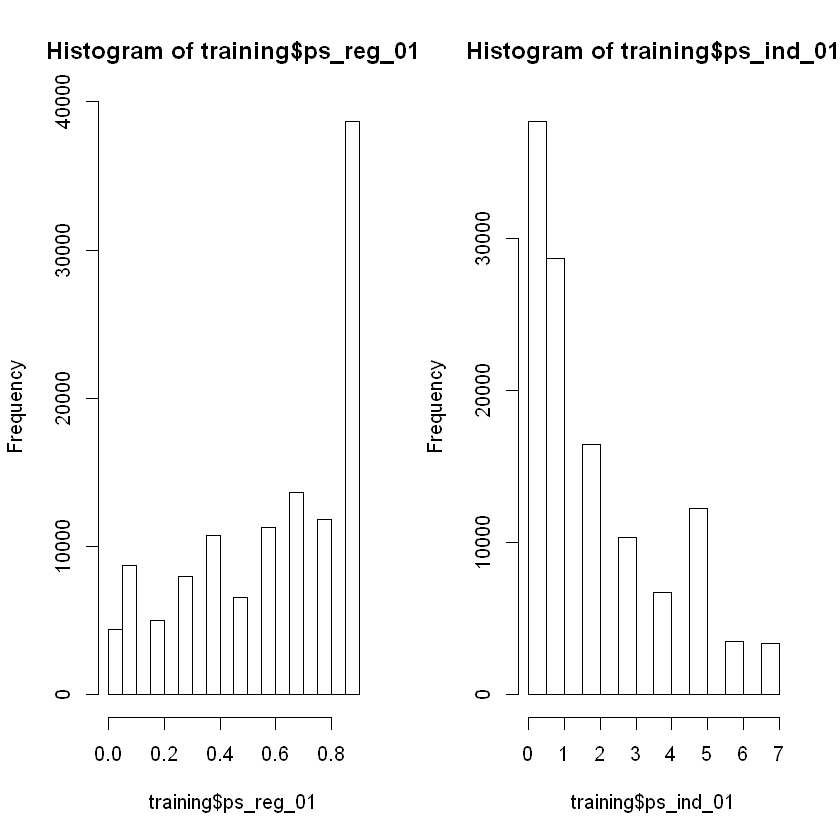

In [53]:
print("training$ps_reg_01")
sum(training$ps_reg_01==-1)
print("training$ps_ind_02_cat")
sum(training$ps_ind_01==-1)
par(mfrow=c(1,2)) 
hist(training$ps_reg_01)
hist(training$ps_ind_01)

[1] "training$ps_car_04_cat"


[1] 0

[1] "training$ps_ind_08_bin"


[1] 0

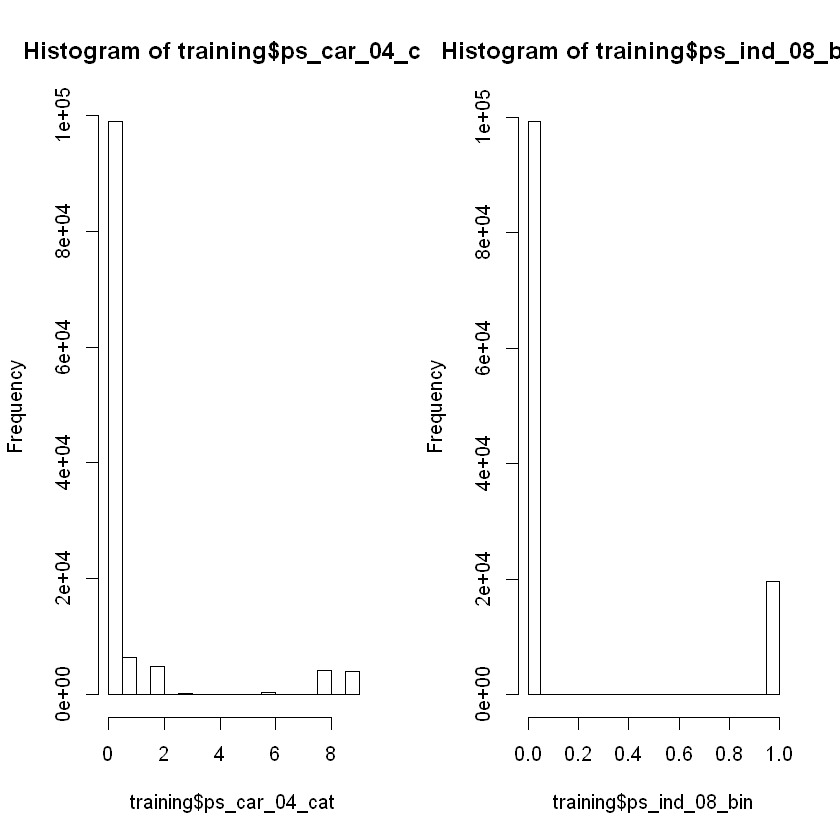

In [54]:
print("training$ps_car_04_cat")
sum(training$ps_car_04_cat==-1)
print("training$ps_ind_08_bin")
sum(training$ps_ind_08_bin==-1)
par(mfrow=c(1,2)) 
hist(training$ps_car_04_cat)
hist(training$ps_ind_08_bin)

In [55]:
training$ps_ind_08_bin <- NULL 

[1] "training$ps_car_04_cat"


[1] 0

[1] "training$ps_ind_09_bin"


[1] 0

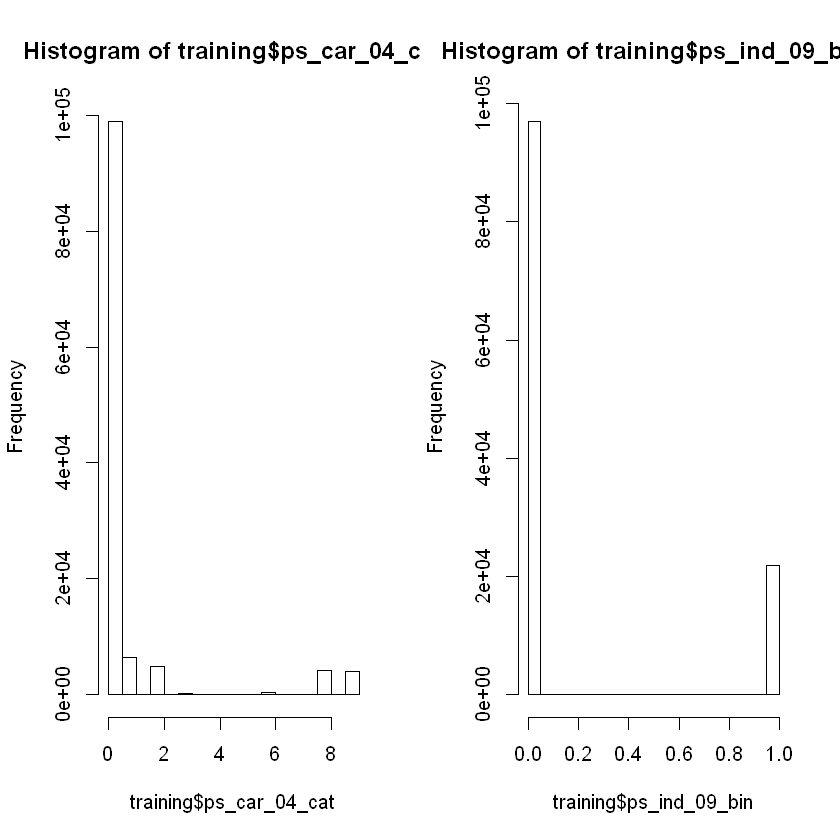

In [56]:
print("training$ps_car_04_cat")
sum(training$ps_car_04_cat==-1)
print("training$ps_ind_09_bin")
sum(training$ps_ind_09_bin==-1)
par(mfrow=c(1,2)) 
hist(training$ps_car_04_cat)
hist(training$ps_ind_09_bin)

In [57]:
training$ps_ind_09_bin <- NULL 

[1] "training$ps_car_13"


[1] 0

[1] "training$ps_ind_01"


[1] 0

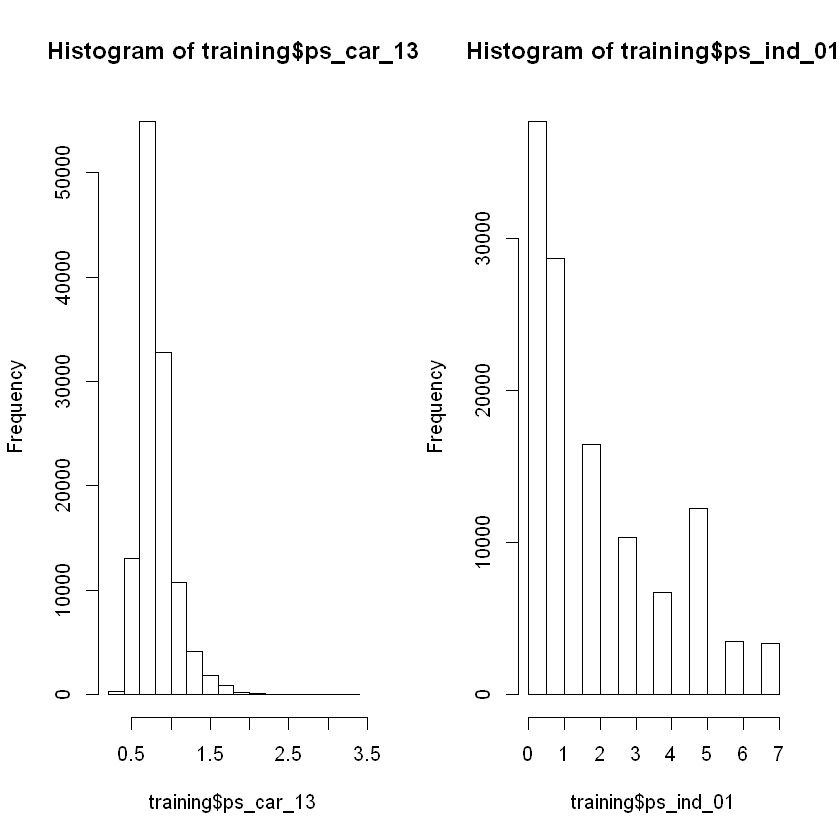

In [58]:
print("training$ps_car_13")
sum(training$ps_car_13==-1)
print("training$ps_ind_01")
sum(training$ps_ind_01==-1)
par(mfrow=c(1,2)) 
hist(training$ps_car_13)
hist(training$ps_ind_01)

#### Grid Search In R - Managed by SuperML library

Grid search CV is used to train a machine learning model with multiple combinations of training hyper parameters and finds the best combination of parameters which optimizes the evaluation metric.
It creates an exhaustive set of hyperparameter combinations and train model on each combination.

In [59]:
rf <- RFTrainer$new()
gst <-GridSearchCV$new(trainer = rf,
parameters = list(n_estimators = c(100),
max_depth = c(5,2,10)),
n_folds = 3,
scoring = c('accuracy','auc'))

new() method Arguments:
trainer superml trainer object, could be either XGBTrainer, RFTrainer, NBTrainer etc.
parameters list, a list of parameters to tune
n_folds integer, number of folds to use to split the train data
scoring character, scoring metric used to evaluate the best model, multiple values can be provided. currently supports: auc, accuracy, mse, rmse, logloss, mae, f1, precision, recall


In [86]:
rf <- RFTrainer$new()
gst <-GridSearchCV$new(trainer = rf,
parameters = list(n_estimators = c(100),
max_depth = c(5,2,10)),
n_folds = 3,
scoring = c('accuracy','auc'))
data("train_l")
gst$fit(train_l, "target")

Warning message in data("training"):
"data set 'training' not found"

[1] "entering grid search"
[1] "In total, 3 models will be trained"


In [62]:
gst$accuracy

[1] 90.57

In [63]:
gst$auc

[1] 71.58

In [68]:
testing$ps_ind_11_bin <- NULL 
testing$ps_ind_12_bin <- NULL 
testing$ps_ind_08_bin <- NULL 
testing$ps_ind_09_bin <- NULL 

##### Default logistic search without deleted features

In [64]:
logmod_second <- glm(target ~ . - id, data = training, family = binomial(link = 'logit'))

In [69]:
preds <- predict(logmod_second, newdata = testing, type = "response")

In [72]:
y_pred_num <- ifelse(preds > 0.2, 1, 0)
y_pred <- factor(y_pred_num, levels=c(0, 1))
y_act <- testing$target

# Accuracy
mean(y_pred == y_act)  

[1] 0.963425

In [73]:
ROCRpred_second = prediction(preds, testing$target)

In [74]:
ROCRperf = performance(ROCRpred_second, "tpr", "fpr")

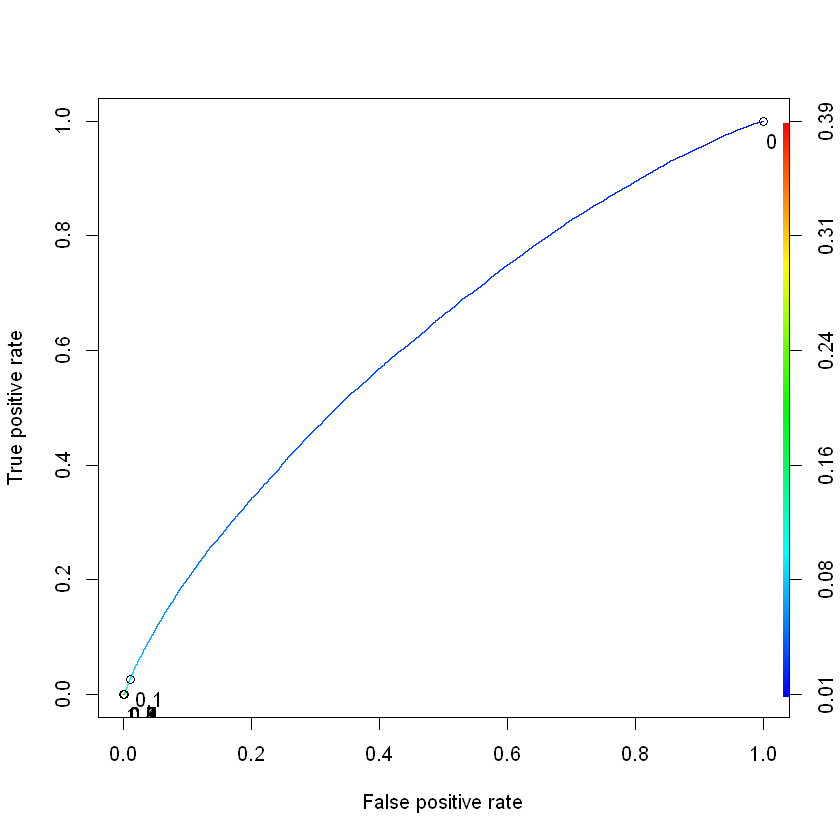

In [75]:
plot(ROCRperf, colorize=TRUE, print.cutoffs.at=seq(0,1,by=0.1), text.adj=c(-0.2,1.7))

In [80]:
auc.tmp <- performance(ROCRpred_second,"auc");
auc <- as.numeric(auc.tmp@y.values)

In [81]:
auc

[1] 0.6187984

   
     FALSE   TRUE
  0 454543   4427
  1  16866    473

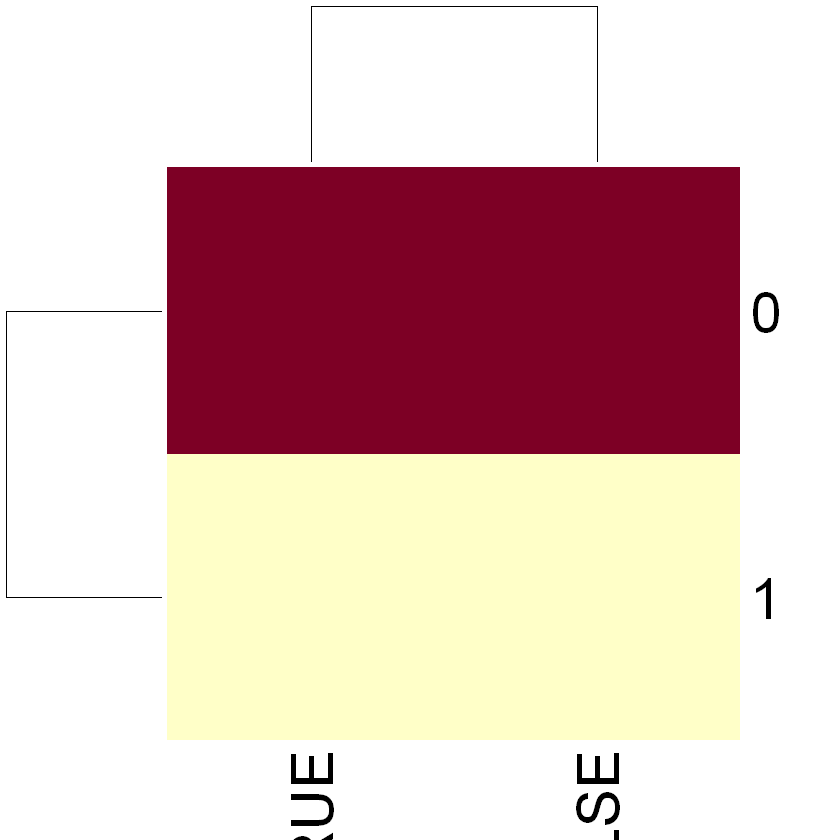

In [87]:
# Use 'scale' to normalize
table(testing$target, preds > 0.1)

data <- as.matrix(table(testing$target, preds > 0.1))
heatmap(data, scale="column")